In [2]:
import numpy as np
import matplotlib.pyplot as plt

import games 
import evaluation_contextual
import synthetic_data

import randcbpside2
import PGTS
import PGIDSratio
import random_algo
import cbpside
import STAP_Helmbolt
import CesaBianchi

In [7]:

class LinearContexts:
    def __init__(self, w):
        self.d = len(w) #number of features
        self.w = w
        self.type = 'linear'
        self.normalize()

    def normalize(self,):
        all = []
        for _ in range(100000):
            c,d = self.get_context(False)
            all.append( c )
        all = np.array(all)
        self.mean = np.mean(all,0)
        self.std = np.std(all,0 )

    def get_context(self, normalize):
        context = np.random.uniform(0, 1,  self.d )
        context = np.array(context).reshape(self.d,1)
        val = self.w @ context
        distribution = [ val[0], 1-val[0] ]
        if normalize:
            context = ( context - self.mean ) / self.std
        return context, distribution

horizon = 1000


# game = games.label_efficient()
game = games.apple_tasting(False)

np.random.seed(1)
dim = 10
w = np.random.uniform(0, 0.1, 10)
w = w / w.sum()
context_generator = synthetic_data.LinearContexts( w ) 

#####  Label Efficient approaches:
# alg = CesaBianchi.CesaBianchi(game, dim,)

#####  Apple Tasting approaches:
# alg = STAP_Helmbolt.STAP_Helmbolt(game, dim,)
# alg = PGTS.PGTS(game, dim,)
# alg = PGIDSratio.PGIDSratio(game, dim,)

#####  Approaches compatable with both games:
alg = random_algo.Random(game,horizon)
# alg = randcbpside2.RandCPBside(game, dim, 1.01, 0.05, 5, 10, 10e-7)
# alg = cbpside.CBPside(game, dim, 1.01, 0.05)

alg.reset()

eval = evaluation_contextual.Evaluation_contextual(horizon)

res = eval.eval_policy_once(alg, game, [ context_generator , 0  ] )

0
[0.6386172244528779, 0.36138277554712206]
t 0 action 0 outcome 1
0 1 0
1
[0.6606272878293129, 0.3393727121706871]
t 1 action 1 outcome 1
1 1 1
2
[0.6610505110910961, 0.33894948890890386]
2.089333980337618 [[0.70797153]]
4.278667960675237 [[0.66688138]]
q    [array([[0.16916413]]), array([[0.23387038],
       [0.        ]])]
conf    [array([[1.47918897]]), array([[2.853364]])]
union1 [0 1]
t 2 action 1 outcome 1
1 1 1
3
[0.6257345703470523, 0.37426542965294773]
2.617425506613319 [[0.59378586]]
5.334851013226639 [[0.5995384]]
q    [array([[0.15104113]]), array([[0.1439037],
       [0.       ]])]
conf    [array([[1.55419026]]), array([[3.19844803]])]
union1 [0 1]
t 3 action 1 outcome 1
1 1 1
4
[0.3329810797911105, 0.6670189202088894]
2.934053773201766 [[0.58075347]]
5.968107546403533 [[0.53476699]]
q    [array([[-0.09490027]]), array([[-0.29888005],
       [ 0.        ]])]
conf    [array([[1.7039619]]), array([[3.19154693]])]
union1 [0 1]
t 4 action 1 outcome 0
1 0 0
5
[0.36745680086215

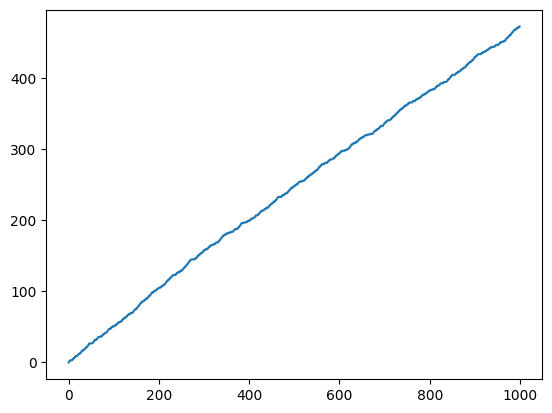

In [8]:
plt.plot( range(horizon), res)

res3

In [15]:
import numpy as np
import evaluation

horizon = 500
eval = evaluation.Evaluation(horizon, )
import randcbp



game = games.apple_tasting(False)


alg = randcbp.RandCBP(game,1.01, 1,5,10e-7)
job = [0.15,1-0.15], 0
regret = eval.eval_policy_once(alg,game,job)


In [11]:
res.shape

(1000,)

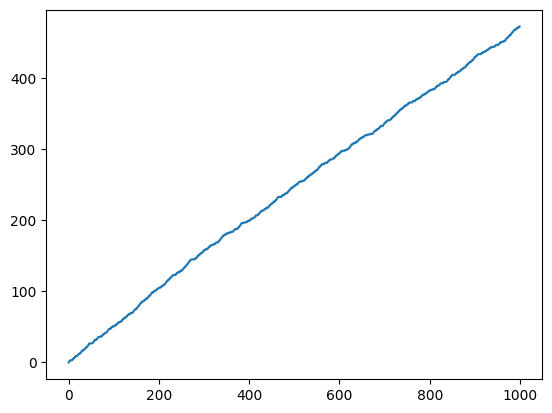

In [16]:
plt.plot( range(1000), res )